In [4]:
%matplotlib inline

# adding `Modules/` to the system path
import sys
sys.path.insert(0, './Modules/')

#TODO: Rename module shortcuts such as hb into something usefull after development
import Hubbard_Class as hb
import Widgets as w
import ipywidgets as widgets
import numpy as np

# Plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
plt.rcParams.update({'font.size':14})

from ipywidgets import HBox, VBox
import functools

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# adding `Modules/` to the system path
import sys
sys.path.insert(0, '../Modules/')

In [6]:
from Module_Widgets_and_Sliders import Text_Box, Save_Figure_Button, Click_Save_Figure, set_filename#
from Widgets import steps_Slider

In [ ]:
h = hb.Hubbard()

In [37]:
h.Calc_H(1,2)

array([[ 1.,  2.,  2.,  2.,  0.,  0., -2.,  0.,  0.],
       [ 2.,  1.,  2.,  0.,  2.,  0.,  0., -2.,  0.],
       [ 2.,  2.,  0.,  0.,  0.,  2.,  0.,  0., -2.],
       [ 2.,  0.,  0.,  1.,  2.,  2.,  2.,  0.,  0.],
       [ 0.,  2.,  0.,  2.,  0.,  2.,  0.,  2.,  0.],
       [ 0.,  0.,  2.,  2.,  2.,  1.,  0.,  0.,  2.],
       [-2.,  0.,  0.,  2.,  0.,  0.,  0.,  2.,  2.],
       [ 0., -2.,  0.,  0.,  2.,  0.,  2.,  1.,  2.],
       [ 0.,  0., -2.,  0.,  0.,  2.,  2.,  2.,  1.]])

In [10]:
m = widgets.interactive(h.Plot_Eigvals_u, u=h.u, n=h.n, s_up=h.s_up, s_down=h.s_down);

output_hubbard = widgets.Output()
filename = set_filename("Hubbard.pdf")
Save_Figure_Button.on_click(functools.partial(Click_Save_Figure, widget=m, name_widget=filename, output=output_hubbard, path=""))

display(HBox([Save_Figure_Button, filename, output_hubbard]))
display(m, )

interactive(children=(FloatRangeSlider(value=(2.0, 40.0), continuous_update=False, description='todo:', max=40…

In [7]:
t = widgets.interactive(h.Plot_Eigvals_t,t=h.t, n=h.n, s_up=h.s_up, s_down=h.s_down);

output_hubbard_t = widgets.Output()
filename = set_filename("Hubbard_t.pdf")
Save_Figure_Button.on_click(functools.partial(Click_Save_Figure, widget=t, name_widget=filename, output=output_hubbard_t, path=""))

display(HBox([Save_Figure_Button, filename, output_hubbard_t]))
display(t)

interactive(children=(FloatRangeSlider(value=(0.0, 1.0), continuous_update=False, description='todo:', max=5.0…

In [12]:
import numpy as np
import functools

class CachedAttribute(object):
    ''' Computes attribute value and caches it in the instance. '''
    def __init__(self, method, name=None):
        # record the unbound-method and the name
        self.method = method
        self.name = name or method.__name__
    def __get__(self, inst, cls):
        if inst is None:
            # instance attribute accessed on class, return self
            return self
        # compute, cache and return the instance's attribute value
        result = self.method(inst)
        setattr(inst, self.name, result)
        return result
    
def hel(func):
    return functools.wraps(func)(CachedAttribute(func))


In [13]:
class test:
    
    def __init__(self):
        self.a = 3
    
    @hel
    def total(self):
        """Compute or return the total attribute."""
        print("calculated total")
        return np.random.rand(10000,10000) * np.random.rand(10000,10000) # some complicated calculation here

In [14]:
t = test()

In [15]:
t.total

calculated total


array([[0.41056826, 0.01135974, 0.07683257, ..., 0.00098979, 0.1021636 ,
        0.06783131],
       [0.27418065, 0.08306184, 0.30715213, ..., 0.06757998, 0.16562213,
        0.00649641],
       [0.00309582, 0.38006434, 0.13061751, ..., 0.18423263, 0.08079576,
        0.56655017],
       ...,
       [0.16075446, 0.04984393, 0.50888886, ..., 0.07699131, 0.34031282,
        0.13934267],
       [0.00298321, 0.2205502 , 0.85630677, ..., 0.05232088, 0.01270131,
        0.0380122 ],
       [0.0792798 , 0.02557412, 0.50170043, ..., 0.43847951, 0.09903761,
        0.67373324]])

In [16]:
help(t.total)

Help on ndarray object:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |      Any objec

In [17]:
help(test.total)

Help on CachedAttribute in module __main__:

total(...)
    Compute or return the total attribute.



In [36]:
class test2:
    
    def __init__(self):
        self.a = 3
    
    def hel(func):
        return functools.wraps(func)(functools.cached_property(func))
    
    @hel
    def total(self):
        """Compute or return the total attribute."""
        print("calculated total")
        return np.random.rand(10000,10000) * np.random.rand(10000,10000) # some complicated calculation here

In [37]:
t2 = test2()

In [38]:
t2.total

calculated total


array([[8.44573889e-02, 2.43791888e-01, 1.09092533e-01, ...,
        1.54828758e-01, 2.99090326e-01, 3.92635032e-01],
       [4.92585477e-02, 1.71726377e-01, 5.13129133e-03, ...,
        4.73689596e-01, 1.22946199e-01, 4.34872962e-01],
       [4.96115208e-01, 1.90223307e-02, 2.67502652e-01, ...,
        2.71630260e-01, 2.21306518e-01, 5.35398577e-02],
       ...,
       [1.53748147e-01, 1.22552205e-02, 1.74439709e-04, ...,
        2.42331384e-01, 3.92161047e-01, 4.03073318e-01],
       [5.75254882e-01, 1.35893277e-01, 6.69151750e-01, ...,
        3.06516296e-01, 6.79092149e-02, 6.53209991e-02],
       [8.00086061e-01, 1.17536753e-01, 5.00584888e-01, ...,
        1.37043857e-01, 3.13274012e-02, 4.48204272e-02]])

In [39]:
help(t2.total)

Help on ndarray object:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |      Any objec

In [40]:
help(test2.total)

Help on cached_property in module __main__:

total(...)
    Compute or return the total attribute.



In [41]:
import functools

class Descriptor(object):
    def __init__(self, func):
        self.func = func
    def __get__(self, inst, type=None):
        val = self.func(inst)
        setattr(inst, self.func.__name__, val)
        return val

def reify(func):
    return functools.wraps(func)(Descriptor(func))

In [42]:
class test3:
    
    def __init__(self):
        self.a = 3
    
    
    @reify
    def total(self):
        """Compute or return the total attribute."""
        print("calculated total")
        return np.random.rand(10000,10000) * np.random.rand(10000,10000) # some complicated calculation here

In [43]:
t3 = test3()

In [45]:
t3.total

array([[0.01842661, 0.61432   , 0.221759  , ..., 0.23949742, 0.21913391,
        0.05002648],
       [0.01717286, 0.8309738 , 0.44066349, ..., 0.00630947, 0.0033172 ,
        0.02276691],
       [0.50138262, 0.41595151, 0.42653959, ..., 0.00538155, 0.03068838,
        0.01462405],
       ...,
       [0.4452206 , 0.04638368, 0.18465731, ..., 0.21358378, 0.02415466,
        0.25178805],
       [0.14687435, 0.13508099, 0.61732031, ..., 0.11881149, 0.83793621,
        0.68362828],
       [0.45702   , 0.02301658, 0.10729755, ..., 0.09610254, 0.25983993,
        0.03275692]])

In [46]:
help(t3.total)

Help on ndarray object:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |      Any objec

In [47]:
help(test3.total)

calculated total


AttributeError: 'NoneType' object has no attribute 'total'

In [20]:
class cached_property2(property):
    """
    A property that is only computed once per instance and then replaces itself
    with an ordinary attribute. Deleting the attribute resets the property.

    Based on https://github.com/pydanny/cached-property/blob/master/cached_property.py
    """

    def __init__(self, func):
        self.__doc__ = func.__doc__
        self.func = func

    def cached_property_wrapper(self, obj, _cls):
        if obj is None:
            return self

        value = obj.__dict__[self.func.__name__] = self.func(obj)
        return value

    __get__ = cached_property_wrapper

In [21]:
class test4:
    
    def __init__(self):
        self.a = 3
    
    
    @cached_property2
    def total(self):
        """Compute or return the total attribute."""
        print("calculated total")
        return np.random.rand(10000,10000) * np.random.rand(10000,10000) # some complicated calculation here

In [22]:
t4 = test4()

In [23]:
t4.total

calculated total


array([[0.01484285, 0.15456073, 0.22801381, ..., 0.17769043, 0.30547883,
        0.38842183],
       [0.4647524 , 0.40669358, 0.31182014, ..., 0.07013432, 0.48815447,
        0.51877768],
       [0.17487123, 0.4143823 , 0.37261468, ..., 0.00997249, 0.14724166,
        0.06132579],
       ...,
       [0.155376  , 0.78896566, 0.01693158, ..., 0.15655347, 0.13203805,
        0.75538994],
       [0.03303558, 0.67412544, 0.43743717, ..., 0.03761382, 0.51769249,
        0.4709683 ],
       [0.02459108, 0.38400032, 0.10593148, ..., 0.21703178, 0.22920568,
        0.78052202]])

In [24]:
help(t4.total)

calculated total
Help on ndarray object:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional


In [25]:
help(test4.total)


Help on cached_property2 in module __main__:

    Compute or return the total attribute.



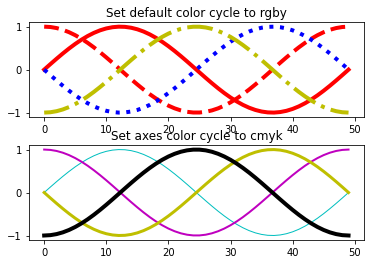

In [2]:
from cycler import cycler
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(0, 2 * np.pi)
offsets = np.linspace(0, 2*np.pi, 4, endpoint=False)
# Create array with shifted-sine curve along each column
yy = np.transpose([np.sin(x + phi) for phi in offsets])

# 1. Setting prop cycle on default rc parameter
plt.rc('lines', linewidth=4)
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'r', 'b', 'y']) +
                           cycler('linestyle', ['-', '--', ':', '-.'])))
fig, (ax0, ax1) = plt.subplots(nrows=2)
ax0.plot(yy)
ax0.set_title('Set default color cycle to rgby')

# 2. Define prop cycle for single set of axes
ax1.set_prop_cycle(cycler('color', ['c', 'm', 'y', 'k']) +
                   cycler('lw', [1, 2, 3, 4]))
ax1.plot(yy)
ax1.set_title('Set axes color cycle to cmyk')

# Tweak spacing between subplots to prevent labels from overlapping
fig.subplots_adjust(hspace=0.3)
plt.show()

In [40]:
import cycler
import matplotlib as mpl

n = 5
color = mpl.pyplot.cm.tab10(np.arange(10)*1)
mpl.rcParams['axes.prop_cycle'] = cycler.cycler('color', color)

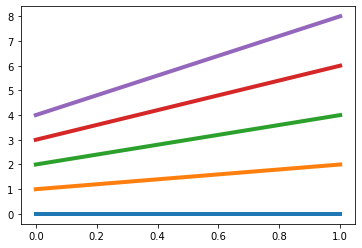

In [41]:
fig, ax = plt.subplots()
for i in range(n):
    ax.plot([0,1], [i, 2*i])

In [29]:
a = np.random.rand(10)*10 // 1
a

array([4., 6., 9., 7., 8., 6., 8., 4., 8., 6.])

In [42]:
b = np.unique(a, return_counts=True)
b

(array([4., 6., 7., 8., 9.]), array([2, 3, 1, 3, 1]))

In [43]:
np.repeat(np.arange(b[1].size), b[1] )

array([0, 0, 1, 1, 1, 2, 3, 3, 3, 4])

In [35]:
color

array([[1.        , 0.49803922, 0.05490196, 1.        ],
       [0.17254902, 0.62745098, 0.17254902, 1.        ],
       [0.17254902, 0.62745098, 0.17254902, 1.        ],
       [0.83921569, 0.15294118, 0.15686275, 1.        ],
       [0.83921569, 0.15294118, 0.15686275, 1.        ]])

In [55]:
c = np.random.rand(4,3) * 10 // 1
c

array([[0., 5., 6.],
       [6., 8., 4.],
       [1., 4., 3.],
       [4., 0., 9.]])

In [62]:
d = np.argsort(c, axis=0)
d.shape

(4, 3)

In [61]:
c[d[:,-1]]

array([[1., 4., 3.],
       [6., 8., 4.],
       [0., 5., 6.],
       [4., 0., 9.]])